<a href="https://colab.research.google.com/github/mariaeco/ICD_project_Maria/blob/main/ProjetoICD_Maria_Limpeza_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Título: "Efeito das diferenças socioeconômicas sobre as notas do Enem na Paraíba"**

## **Objetivo geral:**
Avaliar o perfil socioeconômico dos Estudantes na Paraíba e seus efeitos sobre o desempenho no Exame Nacional de Ensino Médio

###*Objetivos Específicos:*
Avaliar a relação dos fatores abaixo com o desempenho no Enem:
- tipo de escola (privada, particular)
- tipo de dependência admnistrativa (Federal, Estadual, Municipal, Privada)
- cor/raça
- tipo de localização (Rural, Urbana)
- escolaridade dos pais
- tipo de ocupação dos pais
- renda familiar
- numero de pessoas na casa
- acesso a celular, computador e internet



---
##**Limpeza dos dados**
Com base na exploração anterior, percebemos:
- Existem muitos dados faltando (NaN)
- Para algumas variáveis resposta, precisarei remover respostas OU modicar. Por exemplo: *Para OS tipos de escolas ('TP_ESCOLA'), a grande maioria não soube informar o tipo de escola (NI), veja na* [figura](https://drive.google.com/file/d/1iUHhUluc3yTfEyeIsqCgaYWEJuNRVXcH/view?usp=sharingg).
Entretanto, para a variável tipo de admnistração ('TP_DEPENDENCIA_ADM_ESC'), não existe NI, mas sim NaN, todos estão cadastrados em: Federal, Municipal, Estadual e Privada. Podemos considerar então, que Federal, Municipal, Estadual são Públicas, e atribuir 'Publico' para os dados faltantes do tipo de escola ('TP_ESCOLA'). Portanto, se TP_DEPENDENCIA_ADM_ESC == Federal, Municipal ou Estadual = Publica.
- Muitas variáveis interiras estão como float, verificar os tipos de variaveis e mudar para o correto. Muitas também podem ser categóricas e estão com float ou int. Mas vou deixar as cagetóricas como float ou int, exemplo: Tipo de Escola, Tipo de Dependência Escolar!


###**Pacotes Utilizados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**DataFrame**

In [38]:
dfEnem = pd.read_csv('https://raw.githubusercontent.com/mariaeco/ICD_project_Maria/main/DADOS/MicroDadosEnemSelected.csv', sep="\t", encoding='ISO-8859-1' )
dfEnem.head(30)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_COR_RACA,TP_ESCOLA,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,IN_NOME_SOCIAL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q023,Q024,Q025,NOTA_MEDIA
0,190001037515,2019,2507507,João Pessoa,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,G,G,E,E,1,Q,A,B,B,NaN
1,190001125426,2019,2504009,Campina Grande,PB,1,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,B,E,A,A,4,B,A,A,B,NaN
2,190001141066,2019,2516607,Tavares,PB,3,1,NaN,NaN,NaN,NaN,0,620.7,654.7,607.4,831.4,920.0,E,G,D,D,4,E,A,C,B,726.840000
3,190001141273,2019,2502409,Bonito de Santa Fé,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,B,C,A,A,4,C,A,A,B,NaN
4,190001165087,2019,2514503,São José de Piranhas,PB,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,H,E,B,B,4,B,A,A,B,NaN
5,190001261315,2019,2503704,Cajazeiras,PB,1,2,29336708.0,2927408.0,2.0,1.0,0,NaN,490.4,456.1,NaN,640.0,E,D,C,B,5,B,A,A,B,528.833333
6,190001275758,2019,2500304,Alagoa Grande,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,E,E,B,B,3,B,A,B,B,NaN
7,190001288978,2019,2507507,João Pessoa,PB,3,1,NaN,NaN,NaN,NaN,0,485.6,547.5,487.1,461.4,620.0,E,E,B,B,5,C,A,A,A,520.320000
8,190001322032,2019,2503209,Cabedelo,PB,0,1,NaN,NaN,NaN,NaN,0,681.1,686.7,610.8,808.9,640.0,E,F,D,D,1,A,A,B,B,685.500000
9,190001335615,2019,2511202,Pedras de Fogo,PB,3,1,NaN,NaN,NaN,NaN,0,438.6,491.2,548.2,468.9,760.0,C,D,B,B,6,A,A,B,B,541.380000


##**Tipos de Variáveis**

In [ ]:
dfEnem.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
TP_COR_RACA                  int64
TP_ESCOLA                    int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
IN_NOME_SOCIAL               int64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
Q001                        object
Q002                        object
Q003                        object
Q004                        object
Q005                         int64
Q006                        object
Q023                        object
Q024                        object
Q025                        object
NOTA_MEDIA                 float64
dtype: object

As *variáveis 'CO_ESCOLA' e 'CO_MUNICIPIO_ESC'*, estão com float, mas devem ser int. Modificando todas abaixo:

In [ ]:
#dfEnem.astype({"CO_ESCOLA":  int}) # Há os dados NA que configura erro ao transformar, como lidar com isso?
# As opções são retirar ou preencher.
# Não posso remover, pois são muitos dados, perderia muita coisa
# Posso atribuir zero para esse caso e para 'CO_MUNICIPIO_ESC', mas não acho legal atribuir zero, pq zero de qualquer forma é um valor
# Utilizando a função abaixo funciona, pois ele transforma apenas os dados existentes em Int:
#    astype({'CO_ESCOLA': pd.Int32Dtype()})


In [ ]:
dfEnem['CO_ESCOLA']= dfEnem['CO_ESCOLA'].astype({'CO_ESCOLA': pd.Int64Dtype()}) # escolhendo apenas as variáveis numéricas para serem inteiras
dfEnem['CO_MUNICIPIO_ESC']= dfEnem['CO_MUNICIPIO_ESC'].astype({'CO_MUNICIPIO_ESC': pd.Int64Dtype()})
dfEnem.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
TP_COR_RACA                  int64
TP_ESCOLA                    int64
CO_ESCOLA                    Int64
CO_MUNICIPIO_ESC             Int64
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
IN_NOME_SOCIAL               int64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
Q001                        object
Q002                        object
Q003                        object
Q004                        object
Q005                         int64
Q006                        object
Q023                        object
Q024                        object
Q025                        object
NOTA_MEDIA                 float64
dtype: object

As variáveis *'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_COR_RACA ' e 'IN_NOME_SOCIAL'* , estão com float ou int mas são objetos.

In [ ]:
dfEnem['TP_ESCOLA'].replace({1: 'NI',2:'Publica',3:'Privada'}, inplace=True)
dfEnem['TP_DEPENDENCIA_ADM_ESC'].replace({1.0: 'Federal',2.0:'Estadual',3.0:'Municipal',4.0:'Privada'}, inplace=True)
dfEnem['TP_LOCALIZACAO_ESC'].replace({1: 'Urbana',2:'Rural'}, inplace=True)
dfEnem['TP_COR_RACA'].replace({0:'NI',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indigena'}, inplace=True)
dfEnem['IN_NOME_SOCIAL'].replace({0:'Nao',1:'Sim'}, inplace=True)


In [ ]:
dfEnem.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
TP_COR_RACA                 object
TP_ESCOLA                   object
CO_ESCOLA                    Int64
CO_MUNICIPIO_ESC             Int64
TP_DEPENDENCIA_ADM_ESC      object
TP_LOCALIZACAO_ESC          object
IN_NOME_SOCIAL              object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
Q001                        object
Q002                        object
Q003                        object
Q004                        object
Q005                         int64
Q006                        object
Q023                        object
Q024                        object
Q025                        object
NOTA_MEDIA                 float64
dtype: object

## *TP_ESCOLA* 

*Para OS tipos de escolas ('TP_ESCOLA'), a grande maioria não soube informar o tipo de escola (NI), veja na* [figura](https://drive.google.com/file/d/1iUHhUluc3yTfEyeIsqCgaYWEJuNRVXcH/view?usp=sharingg).
Entretanto, para a variável tipo de admnistração ('TP_DEPENDENCIA_ADM_ESC'), não existe NI, mas sim NaN, todos estão cadastrados em: Federal, Municipal, Estadual e Privada. Podemos considerar então, que Federal, Municipal, Estadual são Públicas, e atribuir 'Publico' para os dados faltantes do tipo de escola ('TP_ESCOLA'). Portanto, se TP_DEPENDENCIA_ADM_ESC == Federal, Municipal ou Estadual = Publica.

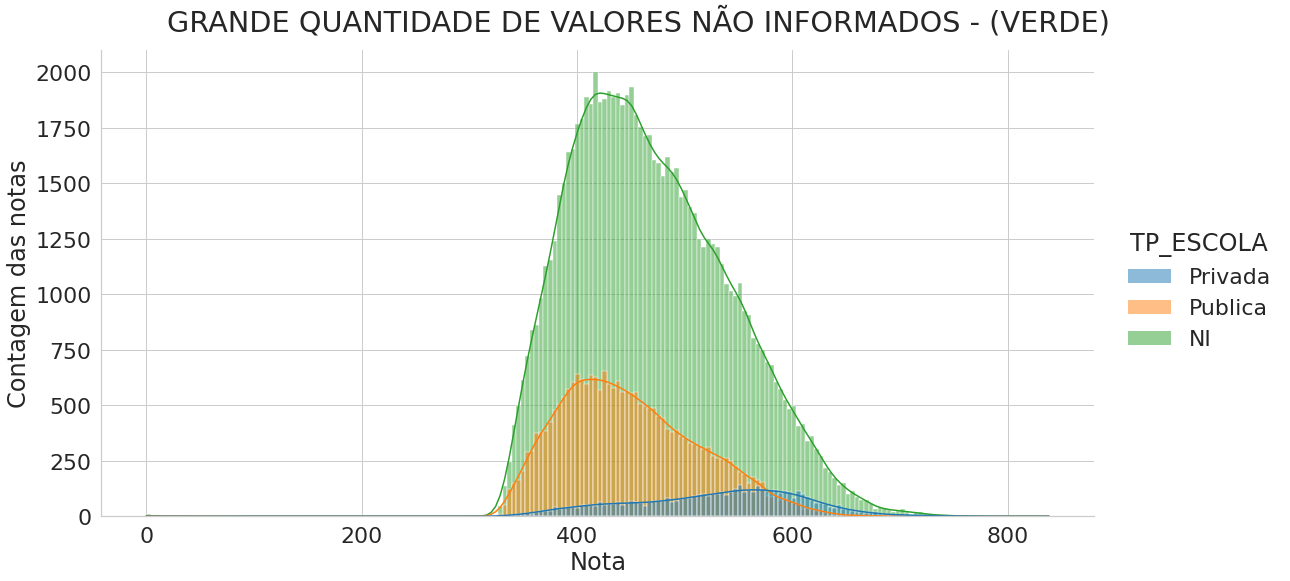

In [ ]:
# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_ESCOLA', 
                x ="NU_NOTA_CN", height=8, aspect=2,bins=200, hue_order=['Privada', 'Publica','NI'],
              alpha=0.5, kde=True)
g.fig.suptitle("GRANDE QUANTIDADE DE VALORES NÃO INFORMADOS - (VERDE)",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");


In [ ]:
for i in dfEnem['TP_DEPENDENCIA_ADM_ESC']:
    if (i=='Estadual') or (i=='Federal') or (i=='Municipal') :
      dfEnem['TP_ESCOLA'].replace({'NI':'Publica'}, inplace=True)

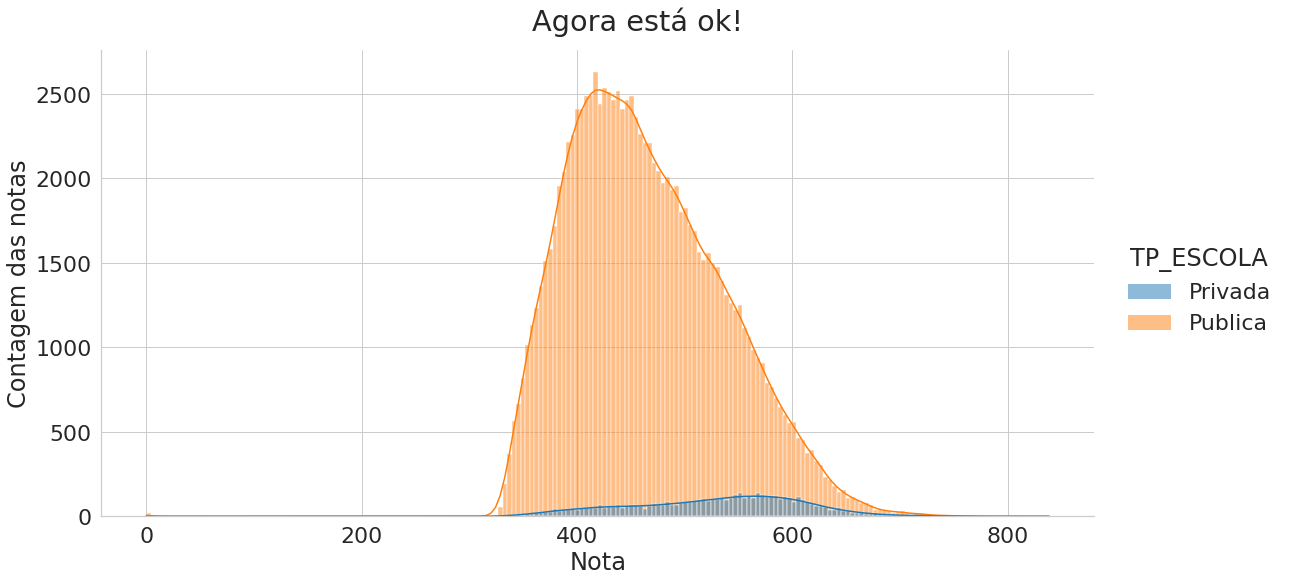

In [ ]:
# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_ESCOLA', 
                x ="NU_NOTA_CN", height=8, aspect=2,bins=200, hue_order=['Privada', 'Publica'],
              alpha=0.5, kde=True)
g.fig.suptitle("Agora está ok!",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");

Para verificarmos melhor, vamos observar a quantidade de estudantes que de fato são de escolas privadas ou de escolas públicas:

In [ ]:
dfEnem.TP_DEPENDENCIA_ADM_ESC.value_counts()

Estadual     21410
Privada       4051
Federal       1660
Municipal       50
Name: TP_DEPENDENCIA_ADM_ESC, dtype: int64

De fato, o número de inscritos de Escolas Públicas (Estadual+Municipal+Federal) é bem maior do que os de Escolas privadas.

Por enquanto não tinha muito de limpeza, considerei melhor não eliminar NAs e outliers até entender melhor. Entretanto, com essas modificações acima o trabalho já fica um banco de dados mais otimizado.